## Getting IoT Data

### Load Required Packages

In [1]:
!pip install python-dotenv

You should consider upgrading via the 'D:\soch1\Projects\IoT_course\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import requests
import csv
from datetime import datetime
import json
import os
from dotenv import load_dotenv


In [3]:
def login(url):
    load_dotenv()
    # Define the username and password
    post_data = {
        'username': os.environ.get('VIZHUB_LOGIN'), 
        'password': os.environ.get('VIZHUB_PW') 
    }

    # Define the headers
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json'
    }

    # Send the POST request
    # response = requests.post(url, data=data)
    response = requests.post(url, headers=headers, data=json.dumps(post_data))

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to fetch data from ThingsBoard API. Status code:", response.status_code)
        return None


In [4]:
def fetch_sensor_data(device_id, sensor_key, start_ts, end_ts, access_token):
    url = f'http://locationai.tech:8080/api/plugins/telemetry/DEVICE/{device_id}/values/timeseries?keys={sensor_key}'
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json',
        'X-Authorization': f'Bearer {access_token}'
    }
    params = {
        'startTs': start_ts,
        'endTs': end_ts
    }
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to fetch data from ThingsBoard API. Status code:", response.status_code)
        return None

In [5]:
def fetch_sensor_data_latest(device_id, sensor_key, access_token):
    url = f'http://locationai.tech:8080/api/plugins/telemetry/DEVICE/{device_id}/values/timeseries?keys={sensor_key}'
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json',
        'X-Authorization': f'Bearer {access_token}'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to fetch data from ThingsBoard API. Status code:", response.status_code)
        return None

In [6]:
def timestamp_to_datetime(timestamp):
    return datetime.utcfromtimestamp(timestamp / 1000).strftime('%Y-%m-%d %H:%M:%S')

In [27]:
import datetime
def get_formatted_time(json_data):
    try:
        # Extract the timestamp from the JSON
        timestamp = json_data['CO2'][0]['ts'] / 1000  # Convert milliseconds to seconds

        # Convert the timestamp to a datetime object
        dt_object = datetime.datetime.fromtimestamp(timestamp)

        # Format the datetime object as desired
        formatted_time = dt_object.strftime('%Y-%m-%d %H:%M')

        return formatted_time
    except (KeyError, IndexError):
        return "Invalid JSON format or missing timestamp."

In [103]:
from datetime import datetime

def convert_timestamp_to_datetime(timestamp_ms):
    # Convert the timestamp to seconds (divide by 1000)
    timestamp_seconds = timestamp_ms / 1000
    
    # Create a datetime object from the timestamp
    dt = datetime.utcfromtimestamp(timestamp_seconds)
    
    # Format the datetime as 'YYYY-MM-DD HH:MM'
    formatted_time = dt.strftime('%Y-%m-%d %H:%M')
    
    return formatted_time

## Getting Data from IoT Platform

In [7]:
url = f'http://locationai.tech:8080/api/auth/login'
response_data = login(url)


In [8]:
access_token = response_data['token']

In [20]:
# device_id = '58366820-ae63-11ee-a39c-0f270afb2199' #STEM2
device_id = 'abdad1d0-81f1-11ee-a39c-0f270afb2199' #CanadaSTEM3

In [28]:
from datetime import datetime

def convert_to_timestamp(date_string):
    try:
        dt_object = datetime.strptime(date_string, "%Y-%m-%d %H:%M")
        timestamp = dt_object.timestamp() * 1000  # Convert to milliseconds
        return int(timestamp)
    except ValueError:
        return "Wrong Date/Time Format"


In [29]:
sensor_key = "CO2"
#start_ts = 1700000000000
#end_ts = 1710000000000
start_ts = convert_to_timestamp("2024-03-06 00:01")
end_ts = convert_to_timestamp("2024-03-06 23:00")

In [30]:
data = fetch_sensor_data(device_id, sensor_key, start_ts, end_ts, access_token)

In [31]:
data

{'CO2': [{'ts': 1709794778154, 'value': '460'},
  {'ts': 1709794753472, 'value': '458'},
  {'ts': 1709794731174, 'value': '462'},
  {'ts': 1709794707647, 'value': '463'},
  {'ts': 1709794686014, 'value': '463'},
  {'ts': 1709794663600, 'value': '465'},
  {'ts': 1709794640870, 'value': '464'},
  {'ts': 1709794618287, 'value': '470'},
  {'ts': 1709794595730, 'value': '470'},
  {'ts': 1709794573228, 'value': '475'},
  {'ts': 1709794550993, 'value': '477'},
  {'ts': 1709794528850, 'value': '476'},
  {'ts': 1709794506366, 'value': '469'},
  {'ts': 1709794483695, 'value': '476'},
  {'ts': 1709794461222, 'value': '475'},
  {'ts': 1709794438502, 'value': '474'},
  {'ts': 1709794415283, 'value': '473'},
  {'ts': 1709794392332, 'value': '475'},
  {'ts': 1709794369676, 'value': '476'},
  {'ts': 1709794346889, 'value': '479'},
  {'ts': 1709794323858, 'value': '480'},
  {'ts': 1709794301480, 'value': '480'},
  {'ts': 1709794276749, 'value': '483'},
  {'ts': 1709794251662, 'value': '485'},
  {'ts': 

Save to CSV file

In [32]:
if data and sensor_key in data:
        timestamps = [entry['ts'] for entry in data[sensor_key]]
        values = [entry['value'] for entry in data[sensor_key]]

        # Convert timestamps to datetime strings
        timestamps = [timestamp_to_datetime(ts) for ts in timestamps]

        with open(f'csv_data/thingsboard_{sensor_key.lower()}_data.csv', 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Timestamp', sensor_key])
            writer.writerows(zip(timestamps, values))

        print(f"Data written to thingsboard_{sensor_key.lower()}_data.csv")
else:
        print(f"No data available for the specified sensor ({sensor_key}) or time range.")

Data written to thingsboard_co2_data.csv


In [33]:
#data

## Organizing the Data

### Converting Data to Dataframe

In [34]:
import pandas as pd

In [35]:
# Convert JSON to DataFrame
df_CO2 = pd.json_normalize(data['CO2'])


In [36]:
df_CO2.head()

,ts,value
0,1709794778154,460
1,1709794753472,458
2,1709794731174,462
3,1709794707647,463
4,1709794686014,463


In [37]:
# Convert the 'ts' column to datetime
df_CO2['ts'] = pd.to_datetime(df_CO2['ts'], unit='ms')

In [38]:
df_CO2.head()

,ts,value
0,2024-03-07 06:59:38.154,460
1,2024-03-07 06:59:13.472,458
2,2024-03-07 06:58:51.174,462
3,2024-03-07 06:58:27.647,463
4,2024-03-07 06:58:06.014,463


In [39]:
df_CO2.rename(columns={"ts": "Lastupdatetime"}, inplace=True)
df_CO2.rename(columns={"value": "CO2"}, inplace=True)

In [40]:
df_CO2.head()

,Lastupdatetime,CO2
0,2024-03-07 06:59:38.154,460
1,2024-03-07 06:59:13.472,458
2,2024-03-07 06:58:51.174,462
3,2024-03-07 06:58:27.647,463
4,2024-03-07 06:58:06.014,463


### Getting Temperature Data

In [47]:
sensor_key = "Temperature"
start_ts = convert_to_timestamp("2024-03-06 00:01")
end_ts = convert_to_timestamp("2024-03-06 23:00")
start_ts

1709712060000

In [48]:
temperature_data = fetch_sensor_data(device_id, sensor_key, start_ts, end_ts, access_token)

In [49]:
# Convert JSON to DataFrame
df_temp = pd.json_normalize(temperature_data['Temperature'])

In [50]:
# Convert 'ts' to datetime format to match 'Lastupdatetime'
df_temp['ts'] = pd.to_datetime(df_temp['ts'], unit='ms')

# Rename 'ts' to 'Lastupdatetime' in df_temp
df_temp.rename(columns={'ts': 'Lastupdatetime'}, inplace=True)

In [51]:
df_temp.rename(columns={"value": "Temperature"}, inplace=True)

In [52]:
df_temp.head()

,Lastupdatetime,Temperature
0,2024-03-07 06:59:38.154,17
1,2024-03-07 06:59:13.472,16
2,2024-03-07 06:58:51.174,16
3,2024-03-07 06:58:27.647,17
4,2024-03-07 06:58:06.014,16


In [53]:
# Merge the two dataframes on 'Lastupdatetime'
df_merged = pd.merge(df_CO2, df_temp, on='Lastupdatetime')

In [54]:
df_merged.tail()

,Lastupdatetime,CO2,Temperature
95,2024-03-07 06:23:34.692,563,17
96,2024-03-07 06:23:12.407,560,17
97,2024-03-07 06:22:50.331,560,17
98,2024-03-07 06:22:27.924,553,17
99,2024-03-07 06:22:06.024,558,17


### Time Series 
Let's visualize the CO / temperature in hourly basis.

In [55]:
aq= df_merged.rename(columns={'Lastupdatetime':'DateTime'})

In [56]:
aq['Weekday'] = aq['DateTime'].dt.day_name()
aq['Month']   = aq['DateTime'].dt.month_name()
aq['Hour']    = aq['DateTime'].dt.hour
aq['Date'] = aq['DateTime'].dt.date

aq.head()

,DateTime,CO2,Temperature,Weekday,Month,Hour,Date
0,2024-03-07 06:59:38.154,460,17,Thursday,March,6,2024-03-07
1,2024-03-07 06:59:13.472,458,16,Thursday,March,6,2024-03-07
2,2024-03-07 06:58:51.174,462,16,Thursday,March,6,2024-03-07
3,2024-03-07 06:58:27.647,463,17,Thursday,March,6,2024-03-07
4,2024-03-07 06:58:06.014,463,16,Thursday,March,6,2024-03-07


In [57]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     100 non-null    datetime64[ns]
 1   CO2          100 non-null    object        
 2   Temperature  100 non-null    object        
 3   Weekday      100 non-null    object        
 4   Month        100 non-null    object        
 5   Hour         100 non-null    int32         
 6   Date         100 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 5.2+ KB


In [58]:
aq['CO2'] = aq['CO2'].astype(int)
aq['Temperature'] = aq['Temperature'].astype(int)


In [59]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     100 non-null    datetime64[ns]
 1   CO2          100 non-null    int32         
 2   Temperature  100 non-null    int32         
 3   Weekday      100 non-null    object        
 4   Month        100 non-null    object        
 5   Hour         100 non-null    int32         
 6   Date         100 non-null    object        
dtypes: datetime64[ns](1), int32(3), object(3)
memory usage: 4.4+ KB


## Plot Simple Graphs

In [60]:
import matplotlib.pyplot as plt

In [61]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'CO2')

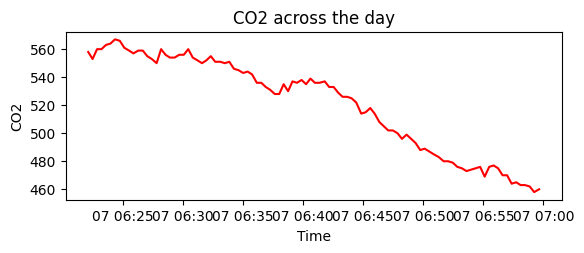

In [62]:
# CO2 graph
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(aq['DateTime'], aq['CO2'], color='red')
plt.title('CO2 across the day')
plt.xlabel('Time')
plt.ylabel('CO2')

Text(0, 0.5, 'Temperature (°C)')

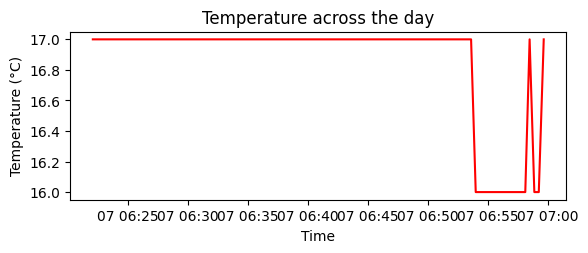

In [63]:
# Temperature graph
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 1st subplot
plt.plot(aq['DateTime'], aq['Temperature'], color='red')
plt.title('Temperature across the day')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

In [64]:
plt.show()

# Data Analysis and Visualization with Temperature and Humidity

### This data represents the indoor air quality at different times, with temperature in °C, humidity in %, CO2 in ppm (parts per million), and TVOC (Total Volatile Organic Compounds) in ppb (parts per billion). All values are within the recommended ranges for good indoor air quality. Please note that the CO2 and TVOC values are hypothetical and may not represent typical indoor levels

### Data Analysis

1.  **Exploratory Data Analysis (EDA):**
    
    *   **Trend Analysis:** Examine how each variable changes over time.
    *   **Seasonality Analysis:** Identify repeating patterns or cycles in the data.
    *   **Correlation Analysis:** Investigate the relationship between pairs of variables (e.g., Temperature vs. CO2 concentration).
2.  **Statistical Analysis:**
    
    *   **Descriptive Statistics:** Calculate mean, median, variance, etc., for each variable.
    *   **Distribution Analysis:** Analyze the distribution of each variable using histograms or kernel density estimations.
    *   **Hypothesis Testing:** Test hypotheses about the relationships between variables (e.g., Pearson's correlation, Spearman's rank correlation).
3.  **Visualization:**
    
    *   **Time Series Plot:** Plot each variable over time to visualize trends and patterns.
    *   **Heatmaps:** Use heatmaps to visualize correlations between variables.
    *   **Box Plots and Violin Plots:** To visualize the distribution and outliers in the data.

### Data Prediction

1.  **Time Series Forecasting:**
    
    *   **ARIMA (AutoRegressive Integrated Moving Average):** For forecasting future values of each variable based on its own past values.
    *   **SARIMA (Seasonal ARIMA):** An extension of ARIMA that supports univariate time series data with a seasonal component.
    *   **Prophet:** Developed by Facebook, it's useful for forecasting with daily observations that display patterns on different time scales.
2.  **Machine Learning Models:**
    
    *   **Regression Models:** Linear Regression, Polynomial Regression for predicting continuous values.
    *   **Random Forest and Gradient Boosting Machines (GBM):** For capturing non-linear relationships in the data.
    *   **Neural Networks:** LSTM (Long Short-Term Memory) networks are especially good for sequences like time series.
3.  **Multivariate Time Series Forecasting:**
    
    *   **Vector AutoRegression (VAR):** Models the relationship between multiple variables and their lagged values.
    *   **Multivariate LSTM:** A deep learning approach to handle multiple inputs for forecasting.
4.  **Evaluation:**
    
    *   Use metrics like MAE (Mean Absolute Error), RMSE (Root Mean Square Error), and MAPE (Mean Absolute Percentage Error) to evaluate the performance of your forecasting models.

### Tools and Libraries

*   **Pandas:** For data manipulation and analysis.
*   **NumPy:** For numerical computations.
*   **Matplotlib** and **Seaborn:** For data visualization.
*   **Statsmodels:** For implementing statistical models.
*   **Scikit-learn:** For machine learning models.
*   **TensorFlow** or **Keras:** For deep learning models.

### Steps to Get Started

1.  **Preprocess the Data:** Clean the data by handling missing values, outliers, and normalizing or standardizing the values if necessary.
2.  **Perform EDA:** Use visualization and statistical analysis to understand the data.
3.  **Model Selection:** Based on EDA, choose appropriate models for forecasting.
4.  **Model Training:** Train the model on historical data.
5.  **Model Evaluation:** Evaluate the model's performance using appropriate metrics.
6.  **Forecasting:** Use the model to make predictions.

In [65]:
# Code to check if seaborn is installed and install it via pip if it is not installed
import subprocess
import pkg_resources
import sys

def install_package(package_name):
    try:
        # Check if the package is already installed
        pkg_resources.get_distribution(package_name)
        print(f"{package_name} is already installed.")
    except pkg_resources.DistributionNotFound:
        # If the package is not installed, install it using pip
        print(f"{package_name} is not installed, installing now...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"{package_name} has been successfully installed.")

In [66]:
install_package('Pyarrow')

Pyarrow is already installed.


## Data Analysis
### 1.  **Exploratory Data Analysis (EDA):**
    
    *   **Trend Analysis:** Examine how each variable changes over time.
    *   **Seasonality Analysis:** Identify repeating patterns or cycles in the data.
    *   **Correlation Analysis:** Investigate the relationship between pairs of variables (e.g., Temperature vs. CO2 concentration).

### 1\. Trend Analysis

This function will plot each variable over time to examine how they change.

In [67]:
def plot_trend_analysis(df):
    df.set_index('DateTime', inplace=True)
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    df['Temperature'].plot(ax=ax[0], title='Temperature Trend')
    df['CO2'].plot(ax=ax[1], title='CO2 Concentration Trend')
    
    for a in ax:
        a.set_ylabel('Value')
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()

In [68]:
aq.head()

,DateTime,CO2,Temperature,Weekday,Month,Hour,Date
0,2024-03-07 06:59:38.154,460,17,Thursday,March,6,2024-03-07
1,2024-03-07 06:59:13.472,458,16,Thursday,March,6,2024-03-07
2,2024-03-07 06:58:51.174,462,16,Thursday,March,6,2024-03-07
3,2024-03-07 06:58:27.647,463,17,Thursday,March,6,2024-03-07
4,2024-03-07 06:58:06.014,463,16,Thursday,March,6,2024-03-07


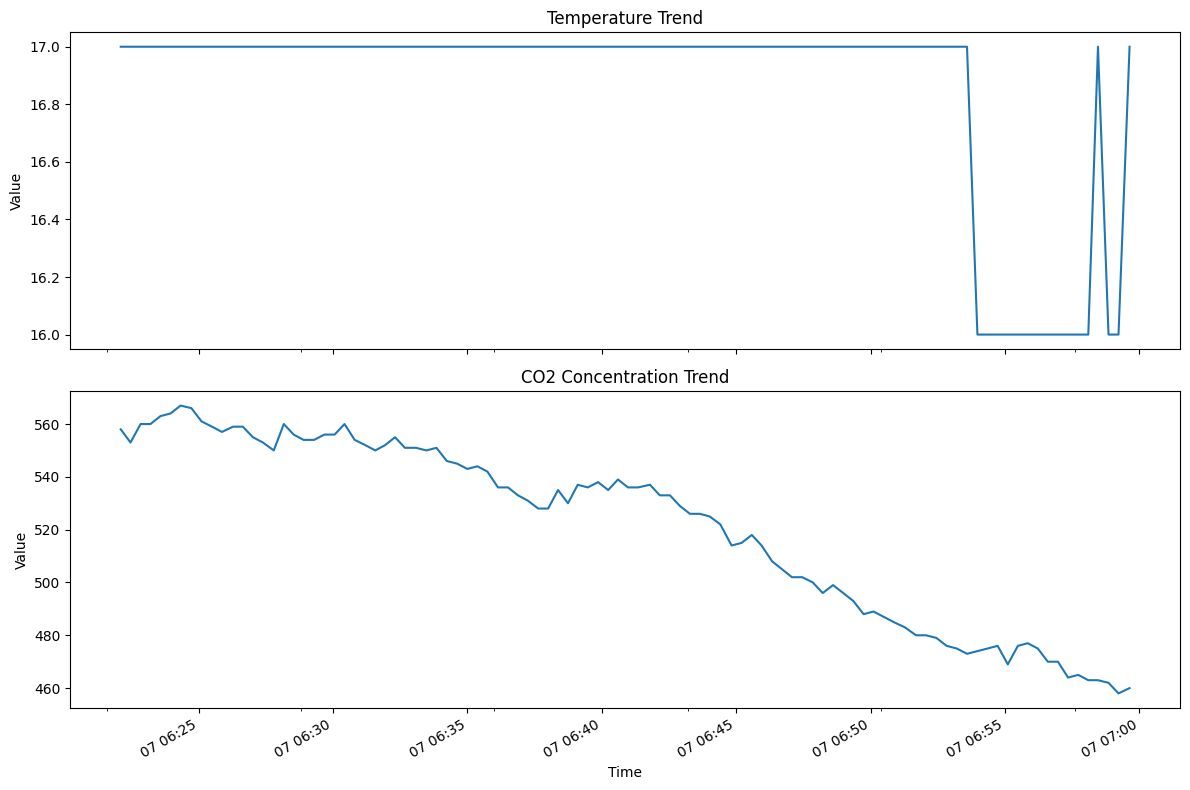

In [69]:
plot_trend_analysis(aq)

In [70]:
def plot_trend_analysis_file(filename):
    df = pd.read_csv(filename, parse_dates=['Lastupdatetime'], dayfirst=True)
    df.set_index('Lastupdatetime', inplace=True)
    
    fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    df['Temperature'].plot(ax=ax[0], title='Temperature Trend')
    df['Humidity'].plot(ax=ax[1], title='Humidity Trend')
    df['CO2'].plot(ax=ax[2], title='CO2 Concentration Trend')
    
    for a in ax:
        a.set_ylabel('Value')
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()

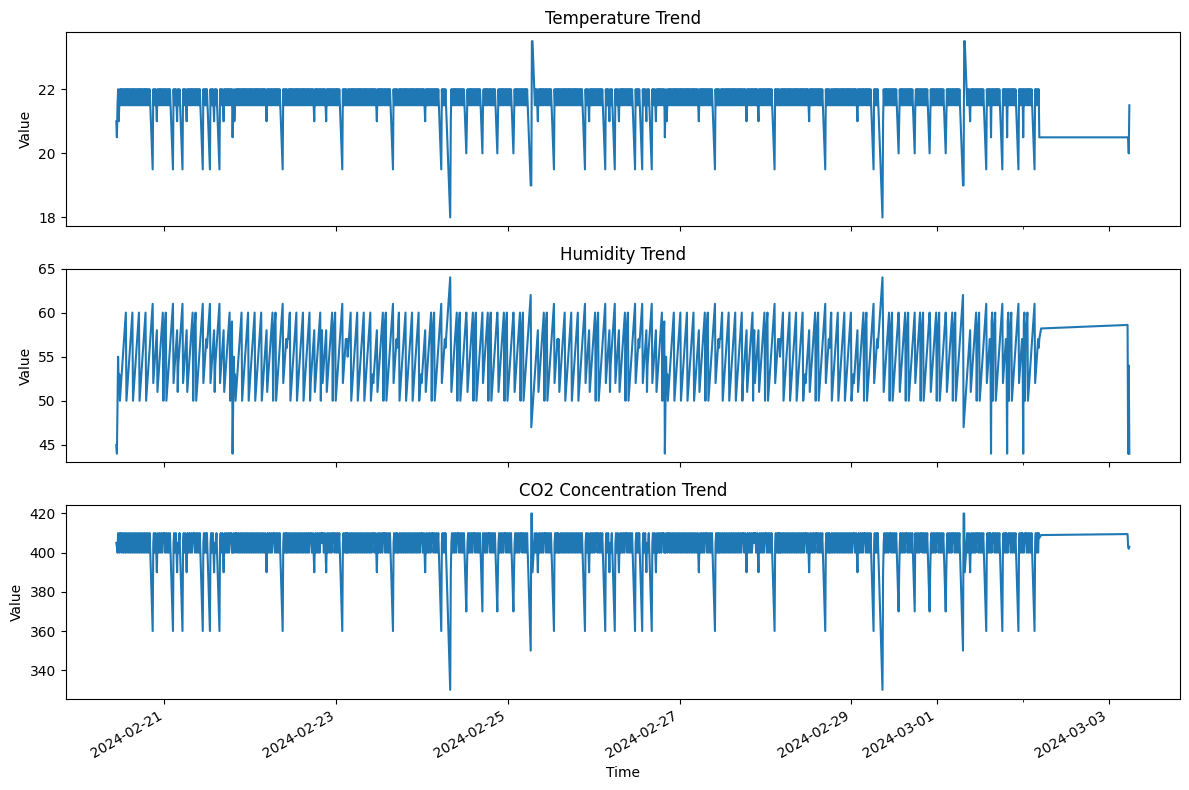

In [71]:
plot_trend_analysis_file('data01.csv')

### 2\. Seasonality Analysis

This function will help identify repeating patterns or cycles in the data, using autocorrelation plots.

Interpreting the Autocorrelation Plot (ACF Plot):
An ACF plot visualizes the autocorrelation at different lags (time intervals).
The x-axis represents the lag in months, and the y-axis represents the correlation coefficient.
Key observations from the ACF plot:
Seasonality: Peaks in the ACF plot indicate significant correlations at specific lags.
For example, high positive correlations might occur at lags 3, 6, 9, and 12 (which correspond to March, June, September, and December).
Negative correlations may also appear for certain months but vanish with increasing lag.

In [72]:
from pandas.plotting import autocorrelation_plot


In [73]:
def plot_seasonality_analysis(df, column):
    plt.figure(figsize=(12, 6))
    autocorrelation_plot(df[column])
    plt.title(f'Seasonality Analysis of {column}')
    plt.show()

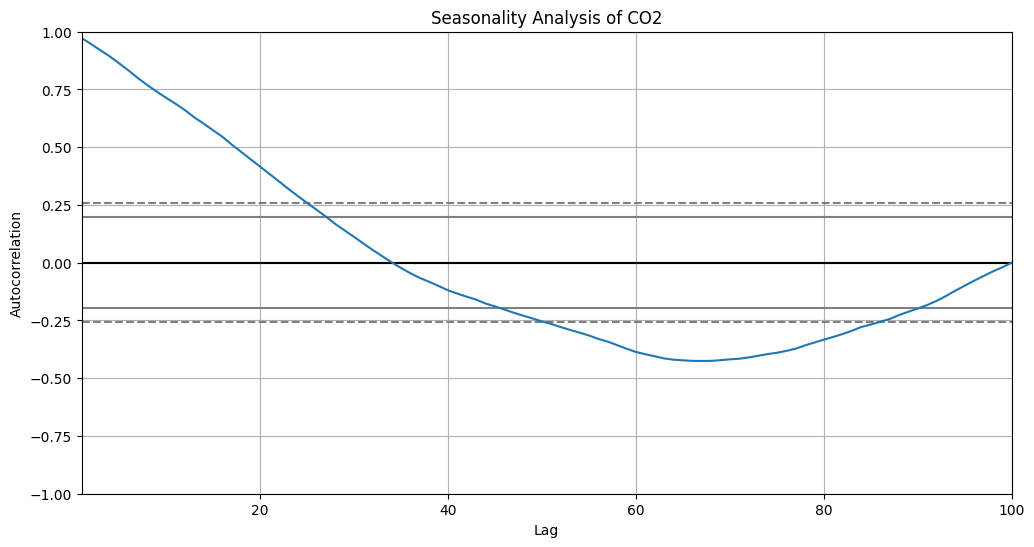

In [74]:
plot_seasonality_analysis(aq, 'CO2')

In [75]:
def plot_seasonality_analysis_file(filename, column):
    df = pd.read_csv(filename, parse_dates=['Lastupdatetime'], dayfirst=True)
    plt.figure(figsize=(12, 6))
    autocorrelation_plot(df[column])
    plt.title(f'Seasonality Analysis of {column}')
    plt.show()

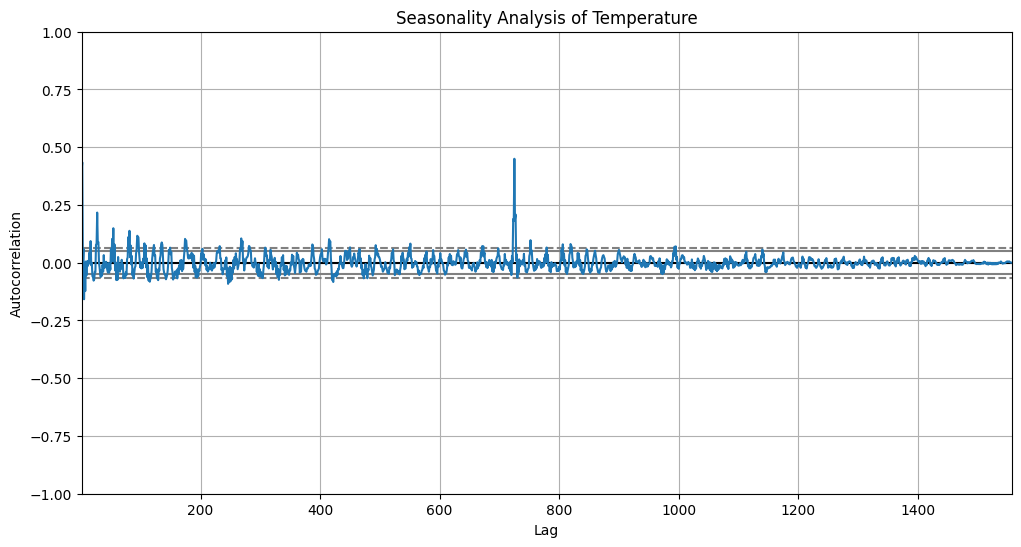

In [76]:
plot_seasonality_analysis_file('data01.csv', 'Temperature')

### 3\. Correlation Analysis

This function will compute and visualize the correlation matrix between pairs of variables.

In [77]:
# Replace 'seaborn' with any package you want to check and install
install_package('seaborn')

seaborn is already installed.


In [78]:
import seaborn as sns

In [79]:
def plot_correlation_analysis(df):
#    correlation_matrix = df.drop('DateTime', axis=1).corr()
#    df1 = df[['CO2', 'Temperature']]
    # Drop non-numeric columns for descriptive stats
    df = df.select_dtypes(include=['float64', 'int64', 'int32'])
    correlation_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Analysis')
    plt.show()

In [80]:
def plot_correlation_analysis_file(filename):
    df = pd.read_csv(filename)
    plot_correlation_analysis(df.drop('Lastupdatetime', axis=1))

In [81]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-03-07 06:59:38.154000 to 2024-03-07 06:22:06.024000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CO2          100 non-null    int32 
 1   Temperature  100 non-null    int32 
 2   Weekday      100 non-null    object
 3   Month        100 non-null    object
 4   Hour         100 non-null    int32 
 5   Date         100 non-null    object
dtypes: int32(3), object(3)
memory usage: 4.3+ KB


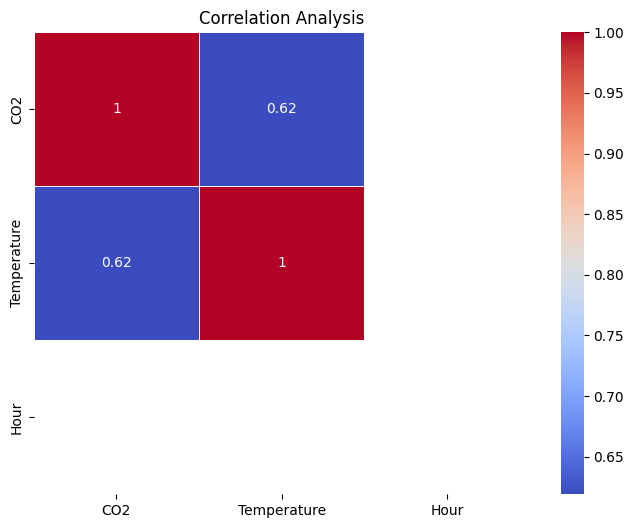

In [82]:
plot_correlation_analysis(aq)

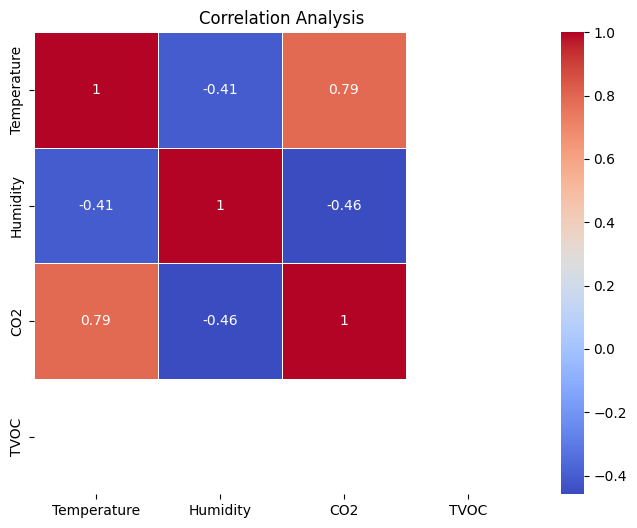

In [83]:
plot_correlation_analysis_file('data01.csv')

## 2.  **Statistical Analysis:**
          **Descriptive Statistics:** Calculate mean, median, variance, etc., for each variable       **Distribution Analysis:** Analyze the distribution of each variable using histograms or kernel density estimation    *   **Hypothesis Testing:** Test hypotheses about the relationships between variables (e.g., Pearson's correlation, Spearman's rank correlation).


### 1\. Descriptive Statistics

This function calculates the mean, median, variance, and standard deviation for each variable.

In [84]:
import pandas as pd

def descriptive_statistics(df):
    # Drop non-numeric columns for descriptive stats
    df_numeric = df.select_dtypes(include=['float64', 'int64', 'int32'])
    descriptives = df_numeric.describe().T
    descriptives['variance'] = df_numeric.var()
    print(descriptives)

In [85]:
def descriptive_statistics_file(filename):
    df = pd.read_csv(filename)
    descriptive_statistics(df)

In [86]:
descriptive_statistics(aq)

             count    mean        std    min     25%    50%    75%    max  \
CO2          100.0  521.25  33.853629  458.0  487.75  533.0  552.0  567.0   
Temperature  100.0   16.86   0.348735   16.0   17.00   17.0   17.0   17.0   
Hour         100.0    6.00   0.000000    6.0    6.00    6.0    6.0    6.0   

                variance  
CO2          1146.068182  
Temperature     0.121616  
Hour            0.000000  


In [87]:
descriptive_statistics_file('data01.csv')

              count        mean        std    min    25%    50%    75%    max  \
Temperature  1557.0   21.583815   0.585170   18.0   21.5   21.5   22.0   23.5   
Humidity     1557.0   55.371227   3.282953   44.0   53.0   56.0   58.0   64.0   
CO2          1557.0  401.874438  10.848312  330.0  400.0  405.0  410.0  420.0   
TVOC         1557.0    0.000000   0.000000    0.0    0.0    0.0    0.0    0.0   

               variance  
Temperature    0.342424  
Humidity      10.777783  
CO2          117.685863  
TVOC           0.000000  


### 2\. Distribution Analysis

This function visualizes the distribution of each variable using histograms and kernel density estimations (KDE).

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

def distribution_analysis(df):
    df_numeric = df.select_dtypes(include=['float64', 'int64', 'int32'])
    for column in df_numeric.columns:
        plt.figure(figsize=(5, 2))
        sns.histplot(df_numeric[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [89]:
def distribution_analysis_file(filename):
    df = pd.read_csv(filename)
    distribution_analysis(df)

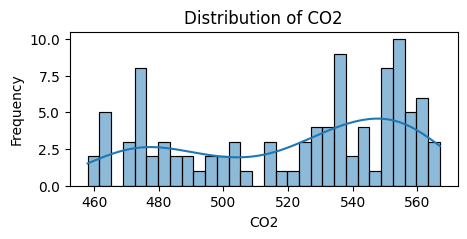

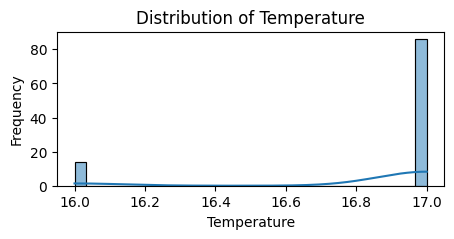

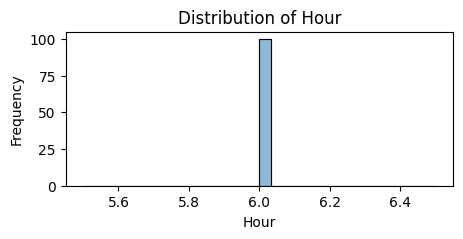

In [90]:
distribution_analysis(aq)

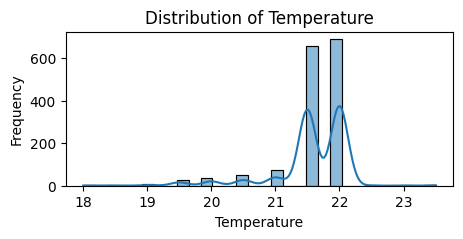

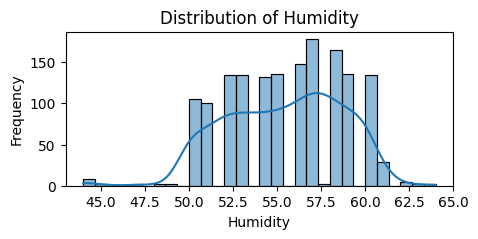

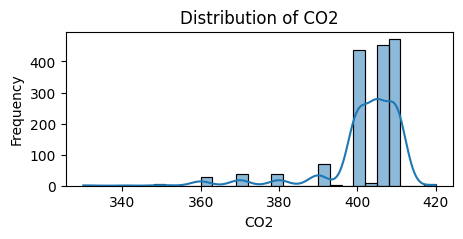

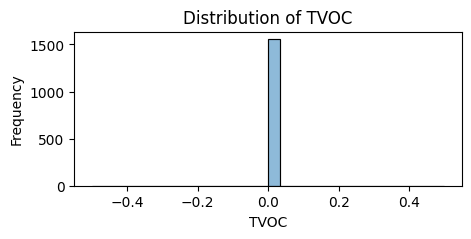

In [91]:
distribution_analysis_file('data01.csv')

### 3\. Hypothesis Testing

This function performs Pearson's correlation and Spearman's rank correlation tests to investigate the relationships between pairs of variables. It's a good way to test hypotheses about the relationships between variables, such as whether there's a linear relationship (Pearson) or a monotonic relationship (Spearman) between them.

In [92]:
# Replace 'scipy' with any package you want to check and install
install_package('scipy')

scipy is already installed.


In [93]:
from scipy.stats import pearsonr, spearmanr

def hypothesis_testing(df, var1, var2):
    # Pearson's correlation
    pearson_corr, pearson_p = pearsonr(df[var1], df[var2])
    print(f"Pearson's correlation between {var1} and {var2}: Correlation={pearson_corr:.3f}, P-value={pearson_p:.3f}")
    
    # Spearman's rank correlation
    spearman_corr, spearman_p = spearmanr(df[var1], df[var2])
    print(f"Spearman's rank correlation between {var1} and {var2}: Correlation={spearman_corr:.3f}, P-value={spearman_p:.3f}")

In [94]:
def hypothesis_testing_file(filename, var1, var2):
    df = pd.read_csv(filename)
    hypothesis_testing(df, var1, var2)

In [95]:
hypothesis_testing(aq, 'Temperature', 'CO2')

Pearson's correlation between Temperature and CO2: Correlation=0.619, P-value=0.000
Spearman's rank correlation between Temperature and CO2: Correlation=0.565, P-value=0.000


In [96]:
hypothesis_testing_file('data01.csv', 'Temperature', 'CO2')

Pearson's correlation between Temperature and CO2: Correlation=0.790, P-value=0.000
Spearman's rank correlation between Temperature and CO2: Correlation=0.343, P-value=0.000


## Data Prediction

### 3. Prophet Forecasting


### Prophet: 
Developed by Facebook, it's useful for forecasting with daily observations that display patterns on different time scales.

In [97]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [98]:
def prophet_forecast(df, variable):
    df = df.rename(columns={'DateTime': 'ds', variable: 'y'})
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    
    future = m.make_future_dataframe(periods=5)
    forecast = m.predict(future)
    
    fig = m.plot(forecast)
    plt.title(f'Prophet Forecast for {variable}')
    plt.show()

In [99]:
aq.head()

,CO2,Temperature,Weekday,Month,Hour,Date
DateTime,,,,,,
2024-03-07 06:59:38.154,460,17,Thursday,March,6,2024-03-07
2024-03-07 06:59:13.472,458,16,Thursday,March,6,2024-03-07
2024-03-07 06:58:51.174,462,16,Thursday,March,6,2024-03-07
2024-03-07 06:58:27.647,463,17,Thursday,March,6,2024-03-07
2024-03-07 06:58:06.014,463,16,Thursday,March,6,2024-03-07


In [100]:
prophet_forecast(aq, 'CO2')

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [101]:
def prophet_forecast_file(filename, variable):
    df = pd.read_csv(filename, usecols=['Lastupdatetime', variable])
    prophet_forecast(df, variable)

In [102]:
prophet_forecast_file('data01.csv', 'CO2')

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [113]:
latest_data = fetch_sensor_data_latest(device_id, sensor_key,  access_token)

In [114]:
latest_data

{'Temperature': [{'ts': 1709795725702, 'value': '17'}]}

In [115]:
formatted_time = get_formatted_time(latest_data)
formatted_time

'Invalid JSON format or missing timestamp.'

In [116]:
aq.head()

,CO2,Temperature,Weekday,Month,Hour,Date
DateTime,,,,,,
2024-03-07 06:59:38.154,460,17,Thursday,March,6,2024-03-07
2024-03-07 06:59:13.472,458,16,Thursday,March,6,2024-03-07
2024-03-07 06:58:51.174,462,16,Thursday,March,6,2024-03-07
2024-03-07 06:58:27.647,463,17,Thursday,March,6,2024-03-07
2024-03-07 06:58:06.014,463,16,Thursday,March,6,2024-03-07


In [117]:
convert_timestamp_to_datetime(1709795433750)

'2024-03-07 07:10'